In [2]:
from dotenv import load_dotenv
import os

# 기존 환경 변수 백업 (비교용)
old_api_key = os.getenv("OPENAI_API_KEY")
if old_api_key:
    print(f"🔄 기존 환경 변수에서 API 키 발견 (길이: {len(old_api_key)} 문자)")
    print(f"   시작 부분: {old_api_key[:15]}...")
else:
    print("ℹ️ 기존 환경 변수에 API 키가 없습니다.")

# .env 파일을 강제로 다시 로드 (기존 환경 변수 덮어쓰기)
# override=True: 이미 설정된 환경 변수도 .env 파일 값으로 덮어씁니다
result = load_dotenv(override=True)

# 로드 결과 확인
if result:
    print("\n✅ .env 파일이 성공적으로 로드되었습니다! (기존 값 덮어쓰기 적용)")
else:
    print("\n⚠️ .env 파일을 찾을 수 없거나 로드에 실패했습니다.")

# 환경 변수 확인 (주요 OpenAI 키 확인)
openai_api_key = os.getenv("OPENAI_API_KEY")
if openai_api_key:
    # 앞뒤 공백 및 따옴표 제거
    openai_api_key = openai_api_key.strip().strip('"').strip("'")
    os.environ["OPENAI_API_KEY"] = openai_api_key  # 정리된 값으로 다시 설정
    
    print(f"\n✅ OPENAI_API_KEY가 설정되어 있습니다. (길이: {len(openai_api_key)} 문자)")
    print(f"   시작 부분: {openai_api_key[:15]}...")
    
    # 이전 값과 비교
    if old_api_key and old_api_key != openai_api_key:
        print(f"   ⚠️ 이전 키에서 변경되었습니다!")
    elif old_api_key and old_api_key == openai_api_key:
        print(f"   ℹ️ 이전 키와 동일합니다.")
else:
    print("\n❌ OPENAI_API_KEY가 설정되어 있지 않습니다.")

# 모든 환경 변수 출력 (디버깅용)
print("\n📋 현재 로드된 환경 변수들:")
env_vars = {k: v for k, v in os.environ.items() if k.startswith(('OPENAI', 'ANTHROPIC', 'LANGCHAIN'))}
if env_vars:
    for key in sorted(env_vars.keys()):
        value = env_vars[key]
        # 값이 너무 길면 일부만 표시
        display_value = value[:20] + "..." if len(value) > 20 else value
        print(f"  {key}: {display_value}")
else:
    print("  (관련 환경 변수가 없습니다)")


🔄 기존 환경 변수에서 API 키 발견 (길이: 164 문자)
   시작 부분: sk-proj--qH2gi5...

✅ .env 파일이 성공적으로 로드되었습니다! (기존 값 덮어쓰기 적용)

✅ OPENAI_API_KEY가 설정되어 있습니다. (길이: 164 문자)
   시작 부분: sk-proj--qH2gi5...
   ℹ️ 이전 키와 동일합니다.

📋 현재 로드된 환경 변수들:
  OPENAI_API_KEY: sk-proj--qH2gi5262O0...


In [22]:
from langchain_openai import ChatOpenAI
import os

query = "what can I do with AI Agent?"

# 환경 변수에서 최신 API 키 가져오기 및 검증
api_key = os.getenv("OPENAI_API_KEY")
if api_key:
    # 앞뒤 공백 제거 및 따옴표 제거
    api_key = api_key.strip().strip('"').strip("'")
    print(f"📝 현재 사용할 API 키:")
    print(f"   길이: {len(api_key)} 문자")
    print(f"   시작 부분: {api_key[:15]}...")
    
    # OpenAI API 키 형식 검증 (일반적으로 sk-로 시작)
    if not api_key.startswith("sk-"):
        print("⚠️ 경고: API 키가 'sk-'로 시작하지 않습니다. 확인이 필요합니다.")
    if len(api_key) < 40 or len(api_key) > 60:
        print(f"⚠️ 경고: API 키 길이가 비정상적입니다. 일반적인 길이는 40-60자입니다.")
else:
    print("❌ API 키를 찾을 수 없습니다!")

# ChatOpenAI 인스턴스 생성
# 환경 변수에서 직접 읽도록 하거나, 명시적으로 전달할 수 있습니다
# 여기서는 명시적으로 전달하여 확실하게 최신 키를 사용합니다
try:
    llm = ChatOpenAI(model="gpt-4o-mini", api_key=api_key)
    print("\n✅ ChatOpenAI 인스턴스가 생성되었습니다.")
    
    # 테스트 호출
    print("\n🔄 API 호출 테스트 중...")
    result = llm.invoke(query)
    print("✅ API 호출 성공!")
    print(f"\n📄 응답 내용:\n{result.content}")
except Exception as e:
    print(f"\n❌ 오류 발생: {type(e).__name__}")
    print(f"   메시지: {str(e)}")
    
    # 에러 메시지에서 어떤 키를 사용했는지 확인
    error_msg = str(e)
    if "Incorrect API key provided" in error_msg:
        print(f"\n⚠️ 에러 메시지에 표시된 키를 확인해보세요.")
        print(f"   만약 이전 키가 표시된다면, Python 커널을 재시작해야 할 수 있습니다.")
    
    print("\n💡 해결 방법:")
    print("   1. Cell 0을 먼저 실행하여 .env 파일을 다시 로드했는지 확인")
    print("   2. .env 파일의 OPENAI_API_KEY 값이 최신인지 확인")
    print("   3. API 키 앞뒤에 따옴표나 공백이 없는지 확인")
    print("   4. 여전히 문제가 있다면 Python 커널을 재시작 (Kernel > Restart Kernel)")
    print("   5. OpenAI 계정에서 API 키가 유효한지 확인")

📝 현재 사용할 API 키:
   길이: 164 문자
   시작 부분: sk-proj--qH2gi5...
⚠️ 경고: API 키 길이가 비정상적입니다. 일반적인 길이는 40-60자입니다.

✅ ChatOpenAI 인스턴스가 생성되었습니다.

🔄 API 호출 테스트 중...
✅ API 호출 성공!

📄 응답 내용:
AI agents can be utilized in a variety of ways across different domains and industries. Here are some common applications:

1. **Customer Support**: AI agents can handle customer inquiries, provide information, and resolve issues through chatbots or virtual assistants, improving response times and customer satisfaction.

2. **Content Generation**: AI can assist in creating written content, such as articles, social media posts, or marketing materials. Tools like GPT-3 can generate creative writing, summaries, or even code.

3. **Data Analysis**: AI agents can analyze large datasets to extract insights, identify trends, and make predictions, assisting businesses in decision-making processes.

4. **Personalization**: AI can tailor experiences for users, such as recommending products, content, or services based on th

In [23]:
from typing import Annotated    
from typing_extensions import TypedDict

from langgraph.graph.message import add_messages
from langchain_core.messages import AnyMessage

class AgentState(TypedDict):
    messages: list[Annotated[AnyMessage, add_messages]]


In [24]:
from sre_parse import State
from langgraph.graph import StateGraph

graph_builder = StateGraph(AgentState)

C:\Users\kilkoon\AppData\Local\Temp\ipykernel_10000\608572426.py:1: DeprecationWarning: module 'sre_parse' is deprecated
  from sre_parse import State


In [25]:
def generate(state: AgentState) -> AgentState:
    messages = state["messages"]
    ai_message = llm.invoke(messages)
    return {"messages": [*messages, ai_message]}

In [26]:
from langgraph.graph import START, END

graph_builder.add_node("generate", generate)
graph_builder.add_edge(START, "generate")
graph_builder.add_edge("generate", END)



In [27]:
graph = graph_builder.compile()

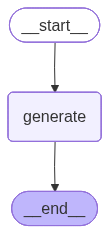

In [28]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [29]:
from langchain_core.messages import HumanMessage

initial_state = {'messages': [HumanMessage(query)]}
graph.invoke(initial_state)

{'messages': [HumanMessage(content='what can I do with AI Agent?', additional_kwargs={}, response_metadata={}),
  AIMessage(content="AI agents can be employed in a wide variety of applications across different domains. Here are some common uses:\n\n1. **Customer Support**: AI chatbots can handle customer inquiries, provide support, and resolve issues without human intervention, improving response times and customer satisfaction.\n\n2. **Personal Assistants**: AI agents like virtual assistants (e.g., Siri, Google Assistant) can help manage schedules, set reminders, answer questions, and control smart devices.\n\n3. **Content Generation**: AI can assist in creating content for blogs, social media, marketing materials, and more, helping save time and resources.\n\n4. **Data Analysis**: AI agents can analyze large datasets to identify trends, make predictions, and generate insights, aiding decision-making in business and research.\n\n5. **Recommendation Systems**: AI can analyze user behav